In [13]:
# get all imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, log_loss # if you're on mac using miniconda miniforge3 install miniforge::compilers to fix issue with this module
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import numpy as np
import os
import matplotlib.pyplot as plt

In [14]:
# Define data transforms from the Ai_Competition github
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize([224,224]),        # Resize the image
        transforms.ToTensor(),                    # Convert the image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], # Normalize with standard values
                             [0.229, 0.224, 0.225]) # Mean and Std for RGB channels
    ]),
    'augmentation': transforms.Compose([
        transforms.RandomResizedCrop([224,224], scale=(0.75,1)),        # Randomly crop the image to 224x224
        transforms.RandomHorizontalFlip(),        # Randomly flip the image horizontally
        transforms.RandomRotation(10),            # Randomly rotate the image by 10 degrees
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Randomly change the brightness, contrast, saturation, and hue
        transforms.RandomVerticalFlip(),          # Randomly flip the image vertically,
        transforms.ToTensor(),                    # Convert the image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], # Normalize with standard values
                             [0.229, 0.224, 0.225]) # Mean and Std for RGB channels
    ]),
    'val': transforms.Compose([
        transforms.Resize([224,224]),                    # Resize the image to 224x224
        transforms.ToTensor(),                     # Convert the image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], # Normalize with standard values
                             [0.229, 0.224, 0.225]) # Mean and Std for RGB channels
    ]),
    'test': transforms.Compose([
        transforms.Resize([224,224]),                    # Resize the image to 224x224
        transforms.ToTensor(),                     # Convert the image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], # Normalize with standard values
                             [0.229, 0.224, 0.225]) # Mean and Std for RGB channels
    ])
}

In [15]:
# Create a custom dataset wrapper in order to do train val test splits
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform
        
    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y
        
    def __len__(self):
        return len(self.subset)

In [23]:
batch_size = 128
data_dir = 'BigDatasetWOurs'
image_dataset = datasets.ImageFolder(data_dir)

train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

total_size = 0

total_size = len(image_dataset)
train_size = int(train_ratio * total_size)
val_size = int(val_ratio * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(image_dataset, [train_size, val_size, test_size])
untransformed_train_dataset = train_dataset
train_dataset = MyDataset(train_dataset, transform=data_transforms['augmentation'])
val_dataset = MyDataset(val_dataset, transform=data_transforms['val'])
test_dataset = MyDataset(test_dataset, transform=data_transforms['test'])


augmented_datasets = []
augmented_dataset = []

# Create multiple augmented train datasets and concatenate them
for i in range(1, 3):  # Create 6 augmented versions
    augmented_dataset = MyDataset(untransformed_train_dataset, data_transforms['augmentation'])
    # Concatenate the original dataset with the new augmented one
    augmented_datasets = torch.utils.data.ConcatDataset([augmented_datasets, augmented_dataset])

train_dataset = torch.utils.data.ConcatDataset([train_dataset, augmented_datasets])

# Create dataloaders from the concatenated datasets
dataloaders = {
    'train': DataLoader(augmented_datasets, batch_size=batch_size, shuffle=True, num_workers=0),
    'val': DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0),
    'test': DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
}

dataset_sizes = {
    'train': len(augmented_datasets),
    'val': len(val_dataset),
    'test': len(test_dataset)
}

print(f"Train dataset size: {dataset_sizes['train']}")
print(f"Validation dataset size: {dataset_sizes['val']}")
print(f"Test dataset size: {dataset_sizes['test']}")



Train dataset size: 20920
Validation dataset size: 2988
Test dataset size: 1496


In [24]:
testImages, testLabels = next(iter(dataloaders['test']))
print(f"Test images shape: {testImages.shape}")
print(f"Test labels shape: {testLabels.shape}")
valImnages, valLabels = next(iter(dataloaders['val']))
print(f"Validation images shape: {valImnages.shape}")
print(f"Validation labels shape: {valLabels.shape}")
trainImages, trainLabels = next(iter(dataloaders['train']))
print(f"Train images shape: {trainImages.shape}")
print(f"Train labels shape: {trainLabels.shape}")

Test images shape: torch.Size([128, 3, 224, 224])
Test labels shape: torch.Size([128])
Validation images shape: torch.Size([128, 3, 224, 224])
Validation labels shape: torch.Size([128])
Train images shape: torch.Size([128, 3, 224, 224])
Train labels shape: torch.Size([128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


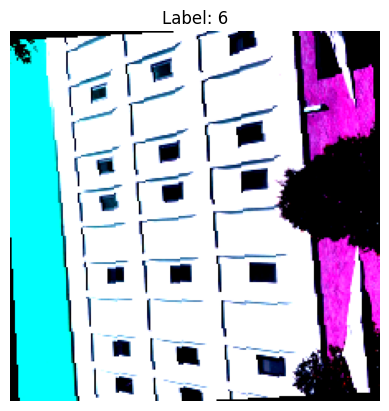

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


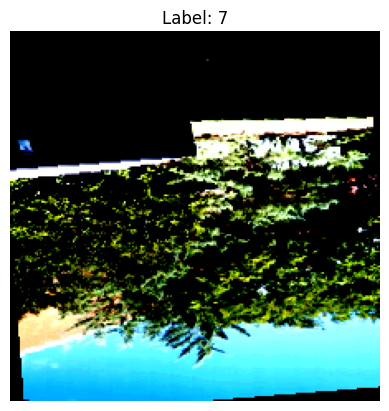

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


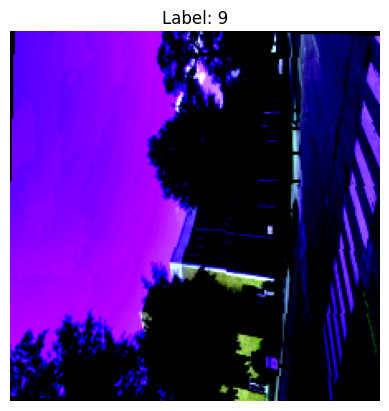

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


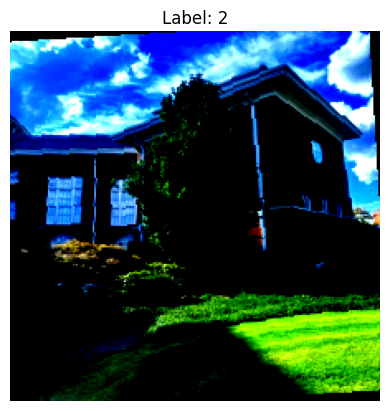

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


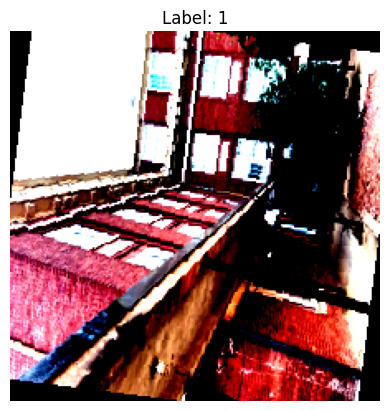

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


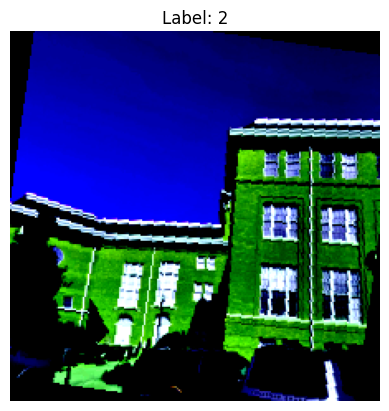

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


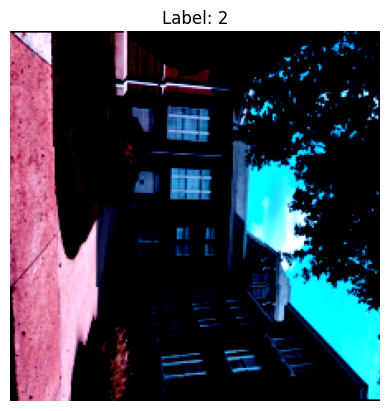

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


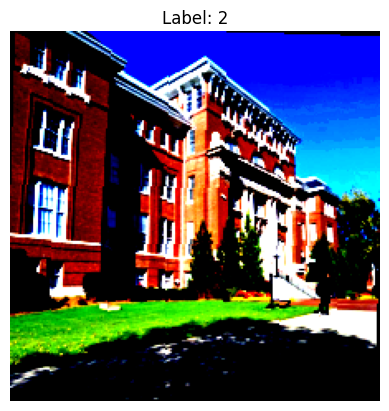

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


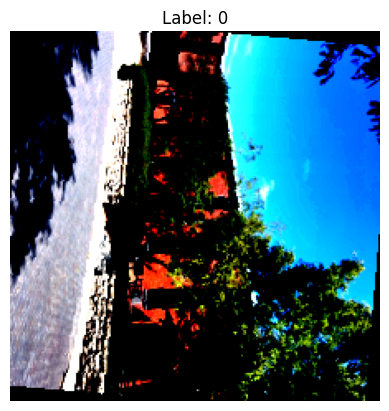

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


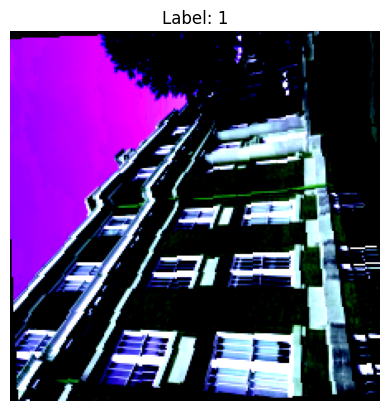

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


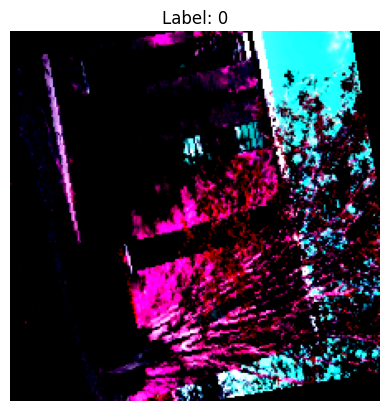

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


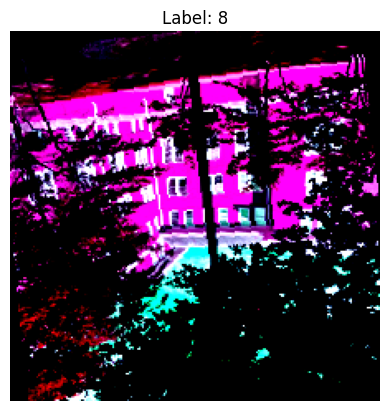

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


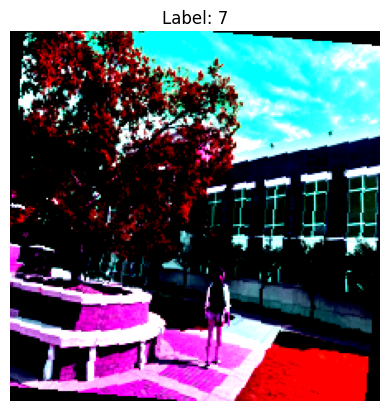

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


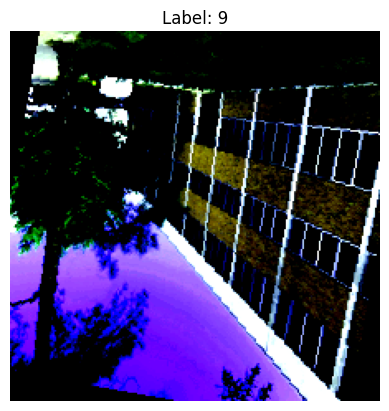

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


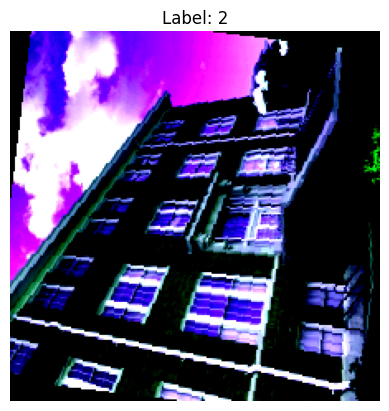

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


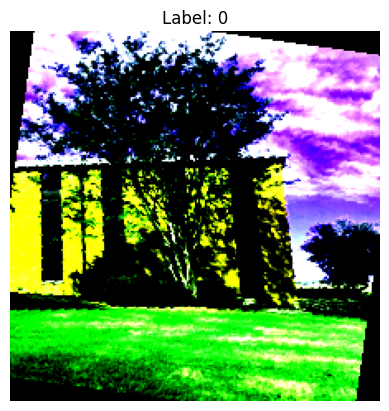

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


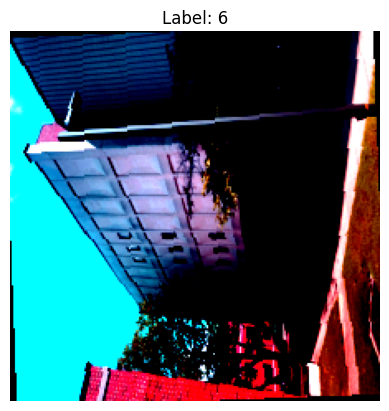

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


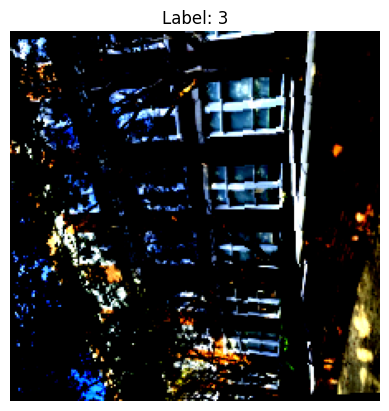

In [8]:
# Convert the tensor image to a numpy array for visualization and look at a batch of 32 images
for i in range(0, 32): 
    plt.imshow(np.transpose(trainImages[i].numpy(), (1, 2, 0)))
    plt.title(f'Label: {trainLabels[i]}')
    plt.axis('off')
    plt.show()

In [9]:
class_names = image_dataset.classes
num_classes = len(image_dataset.classes)
print(class_names)
# Load a pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Get the input dimensions of the last layer (fully connected layer)
num_ftrs = model.fc.in_features

# Replace the last layer with a new one that has `num_classes` outputs
model.fc = nn.Linear(num_ftrs, len(class_names))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
print(device)
model = model.to(device)

['Butler Hall', 'Carpenter Hall', 'Lee Hall', 'McCain Hall', 'McCool Hall', 'Old Main', 'Simrall Hall', 'Student Union', 'Swalm Hall', 'Walker Hall']
True
cuda:0


C:\Users\jobc3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jobc3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 15
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.85) 
best_model_wts = model.state_dict()  # Store the best model weights
best_acc = 0.0  # Track the best validation accuracy

for epoch in range(num_epochs):
    print(f'Epoch {epoch}/{num_epochs - 1}')
    print('-' * 10)
    
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()  # Set the model to training mode
        else:
            model.eval()   # Set the model to evaluation mode
        
        running_loss = 0.0  # Track the loss
        running_corrects = 0  # Track the number of correct predictions
        
        for inputs, labels in dataloaders[phase]:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the GPU/CPU
            
            optimizer.zero_grad()  # Clear the gradients
            
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)  # Forward pass
                _, preds = torch.max(outputs, 1)  # Get the class with the highest score
                loss = criterion(outputs, labels)  # Calculate the loss
                
                if phase == 'train':
                    loss.backward()  # Backpropagate the loss
                    optimizer.step()  # Update the weights
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        
        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]
        
        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        
        if phase == 'val' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = model.state_dict().copy()

print(f'Best val Acc: {best_acc:.4f}')

model.load_state_dict(best_model_wts)

Epoch 0/9
----------
train Loss: 1.9304 Acc: 0.3828
val Loss: 1.4582 Acc: 0.5566
Epoch 1/9
----------
train Loss: 1.1365 Acc: 0.6894
val Loss: 0.9063 Acc: 0.7329
Epoch 2/9
----------
train Loss: 0.7696 Acc: 0.7795
val Loss: 0.6406 Acc: 0.8106
Epoch 3/9
----------
train Loss: 0.5915 Acc: 0.8316
val Loss: 0.4980 Acc: 0.8541
Epoch 4/9
----------
train Loss: 0.4826 Acc: 0.8582
val Loss: 0.4155 Acc: 0.8809
Epoch 5/9
----------
train Loss: 0.4044 Acc: 0.8818
val Loss: 0.3476 Acc: 0.8956
Epoch 6/9
----------
train Loss: 0.3553 Acc: 0.8945
val Loss: 0.3005 Acc: 0.9106
Epoch 7/9
----------
train Loss: 0.3147 Acc: 0.9072
val Loss: 0.2719 Acc: 0.9170
Epoch 8/9
----------
train Loss: 0.2833 Acc: 0.9136
val Loss: 0.2486 Acc: 0.9203
Epoch 9/9
----------
train Loss: 0.2580 Acc: 0.9201
val Loss: 0.2244 Acc: 0.9270
Best val Acc: 0.9270


<All keys matched successfully>

Accuracy: 0.9392
Precision: 0.9402
Recall: 0.9392
F1 Score: 0.9388


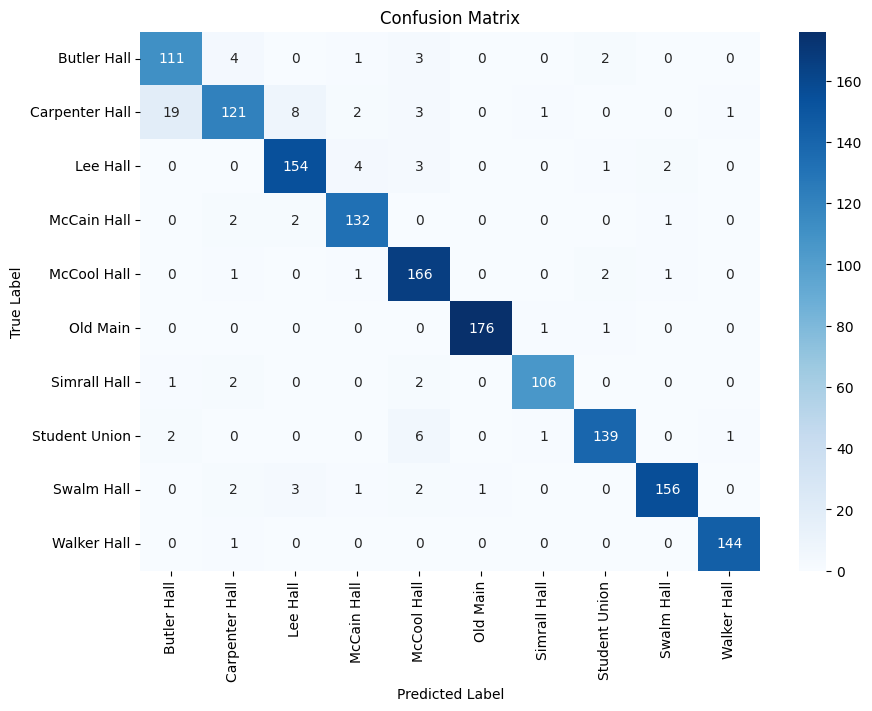

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Evaluate the model on the test set
model.eval()  # Set model to evaluation mode
all_labels = []
all_preds = []
all_probs = []
running_loss = 0.0
dataloader = dataloaders['test']


with torch.no_grad():
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)  # Forward pass
        if torch.isnan(outputs).any():
            print("NaN detected in output!")

        loss = criterion(outputs, labels)  # Calculate the loss
        
        running_loss += loss.item() * inputs.size(0)
        
        _, preds = torch.max(outputs, 1)  # Get the class with the highest score
        probs = torch.nn.functional.softmax(outputs, dim=1)  # Get probabilities
        
        all_labels.extend(labels.cpu().numpy())  # Store true labels
        all_preds.extend(preds.cpu().numpy())    # Store predicted labels
        all_probs.extend(probs.cpu().numpy())    # Store probabilities

avg_loss = running_loss / len(dataloader.dataset)  # Calculate average loss

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

classes = ['Butler Hall', 'Carpenter Hall', 'Lee Hall', 'McCain Hall', 'McCool Hall', 'Old Main', 'Simrall Hall', 'Student Union', 'Swalm Hall', 'Walker Hall']
# Create confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)  # Adjust labels if necessary
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Finally save the best model!
torch.save(model.state_dict(), "best_model_11_8_10_13.pth") 